In [68]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [69]:
from google.colab import drive
# Mounting my Google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
import os

#Setting the local folder path
os.getcwd()
os.chdir(r"/content/drive/My Drive/30 Academic/Deep Learning/HW2")

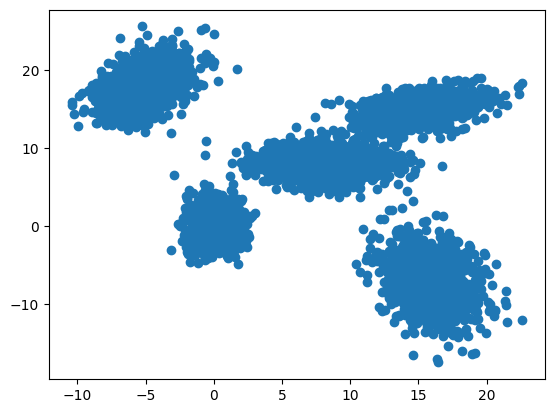

In [71]:
#Load data
data=np.loadtxt('data.txt')

X1 = data[:,0]
X2 = data[:,1]

# Plot Data before clustering
plt.scatter(X1,X2)
plt.show()
Y = np.zeros(data.shape[0])

In [72]:
# Calculate distance
def dist(p1,p2):
  x1 = p1[0]
  y1 = p1[1]
  x2 = p2[0]
  y2 = p2[1]
  dist = math.sqrt((x1 - x2)**2+(y1-y2)**2)
  return dist

#Return a random center
def getRandCenter():
  c1 = np.random.random((1, 2))
  c1 = c1.flatten()
  return c1

# Return K number of random centers
def RandCenters(k):
  center = np.empty((0, 2))
  for _ in range(0,k):
    c = getRandCenter();
    center = np.append(center,  np.array([c]), axis = 0)
  return center

# calculate centroid from common points
def Centroid(points):
  X = points[:,0]
  Y = points[:,1]
  meanX = np.mean(X)
  meanY = np.mean(Y)
  return np.array([meanX,meanY])

In [ ]:
def kmeans_fall2022(data,K):
  centroid = RandCenters(K)

  oldCentroid = np.zeros((K,2));
  oldToNewDist = np.zeros(K)
  dist = np.zeros(K)

  convergenceThreshold = 0.01
  distSqsum = 0;
  tryCount = 0;
  # for tryCount in range(0,100):
  while(1):
    tryCount += 1
    distanceSum = 0;
    distSqsum = 0;


    for index,point in enumerate(data):
      # Calculate distance from all center
      for idx,_ in enumerate(dist):
        dist[idx] = dist(centroid[idx],point)
      # find the minimun distance index
      minIndex = np.where(dist == dist.min())
      #Assign the index to Ylabel
      Y[index] = minIndex[0][0];
      # Calculate Sum of distance and sum of distance square
      distanceSum += dist[minIndex[0][0]]
      distSqsum += dist[minIndex[0][0]]**2

    #Copying old centroids
    oldCentroid = centroid.copy();


    # Recalculate centroid
    for i in range(0,K):
      centroid[i] = Centroid(data[Y==i])


    # Calculate old centroid to new centroid distance
    for i in range(0,K):
      oldToNewDist[i] = dist(oldCentroid[i],centroid[i])


    # Calculate old centroid to new centroid distance mean
    meanDistOldToNew = np.mean(oldToNewDist);

    # If old centroid to new centroid is less than threshold break loop for convergence
    if( meanDistOldToNew < convergenceThreshold):
      break

  # Return distance square sum and centroid position
  return (distSqsum,centroid)



Total cost 40159.77158419175 


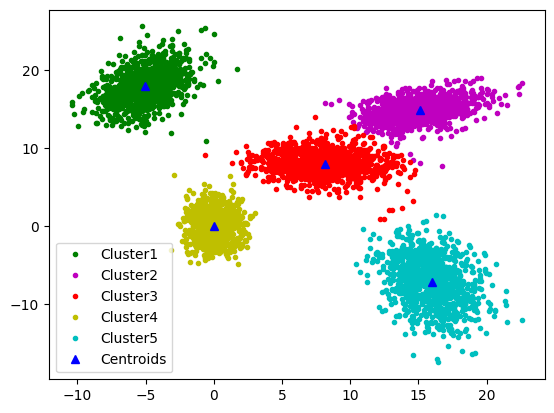

In [73]:
# Calculate k-mean for 5 cluster
cost,Center = kmeans_fall2022(data,5)
print("Total cost %s " % cost)

# Plot the graph
plt.plot(data[Y==0][:,0],data[Y==0][:,1],'g.', label = 'Cluster1')
plt.plot(data[Y==1][:,0],data[Y==1][:,1],'m.' , label = 'Cluster2')
plt.plot(data[Y==2][:,0],data[Y==2][:,1],'r.', label = 'Cluster3')
plt.plot(data[Y==3][:,0],data[Y==3][:,1],'y.', label = 'Cluster4')
plt.plot(data[Y==4][:,0],data[Y==4][:,1],'c.', label = 'Cluster5')
plt.plot(Center[:,0], Center[:,1], 'b^', label = 'Centroids')
plt.legend()

plt.show()

#Elbow Method

Cost : 812698.8366634754
Cost : 497636.5573762514
Cost : 258252.03462851743
Cost : 86516.44387015366
Cost : 40159.177648878016
Cost : 33914.89265528351
Cost : 34441.74641980731
Cost : 33327.51788182345
Cost : 33023.373875199424
Cost : 32824.74568211102


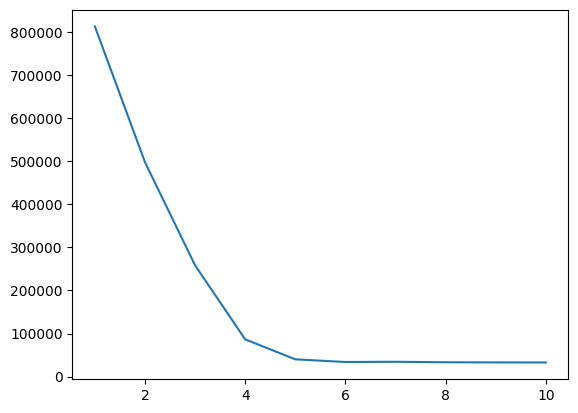

In [74]:
# Calculate K for 1 to 10
k = range(1,11)
Cost = np.zeros(len(k))

# Calculate square sum of distance for different value of k
for index,n in enumerate(k):
  Cost[index],_ = kmeans_fall2022(data,n)
  print("Cost : %s" % Cost[index])
# Plot different cost for different value of k
plt.plot(k,Cost)
plt.show()

In [75]:
# Calculate slope and intercept for y = mx+c equation
def slope_intercept(x1,y1,x2,y2):
  m = (y2 - y1) / (x2 - x1)
  c = y1 - m * x1
  return m,c

# Calculate distance from a point(x0,y0) to line(ax+by+c = 0)
def distance_from_point_to_line(a,b,c,x0,y0):
  d = abs(a*x0+b*y0+c)/math.sqrt(a**2+b**2)
  return d

In [76]:
# function for finding the optimum value of k
def findOtimumK():
  m,c = slope_intercept(k[0],Cost[0],k[8],Cost[8])
  a = m
  b = -1

  distance = np.zeros(len(k))
  for i in range(0,len(k)):
    # print(i)
    distance[i] = distance_from_point_to_line(a,b,c,k[i],Cost[i])
    print("Distance : %s " % distance[i])

  # Optimum value of k is the highest distance from line to the different point of (k,Cost)
  optKIndex = np.where(distance == distance.max())
  return k[optKIndex[0][0]]

# Calculate the optimum value of k
OptimumK = findOtimumK()
print("\nOptimum Value of K : %s " % OptimumK)

Distance : 0.0 
Distance : 2.2327530549600025 
Distance : 3.68900090848794 
Distance : 4.451124755661921 
Distance : 3.926781804641585 
Distance : 2.9908524114149753 
Distance : 1.9854465338722194 
Distance : 0.9968792757884086 
Distance : 1.1945003004658588e-15 
Distance : 0.9979619397281229 

Optimum Value of K : 4 


Total cost 86516.44387015366 


<ipython-input-80-41c94d1eb1c6>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data[Y==i][:,0],data[Y==i][:,1], c = clr, label = 'Cluster'+str(i+1))


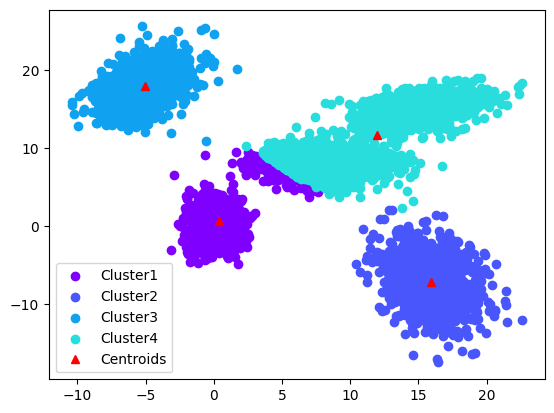

In [80]:
# Calculate k-mean for optimum cluster
from matplotlib.pyplot import cm

cost,Center = kmeans_fall2022(data,OptimumK)
print("Total cost %s " % cost)

# Plot for optimum value of k
color = cm.rainbow(np.linspace(0, 1, n))
for i,clr in zip(range(0,OptimumK),color):
  plt.scatter(data[Y==i][:,0],data[Y==i][:,1], c = clr, label = 'Cluster'+str(i+1))
plt.plot(Center[:,0], Center[:,1], 'r^', label = 'Centroids')
plt.legend()

plt.show()